# Arkansas Erosion Control Usage on Construction Sites Data

In [424]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from geopandas.tools import geocode
from geodatasets import get_path

## Have to drop columns and filter rows to simplify dataframe

In [4]:
df = pd.read_csv('SS_SF Test Data.csv')

In [8]:
df = df.drop(columns = [
    ['Stage', 'Owner Type', 'PSA Docs', 'Plans Specs Available', 'Work Type', 'Note Create Date', 'Update Date'], 
    ['Matching Documents', 'Bid Date', 'Project ID'], 
    ['Design Team Address', 'Design Team Postal Code', 'Design Team State/Province']
])

In [19]:
newdf = df.loc[df['Design Team Role'] == 'Civil Engineer']

In [23]:
newdf.drop(columns = ['Bid Date', 'Project ID', 'Street', 'State/Province', 'Design Team Address', 'Design Team Postal Code', 'Design Team State/Province'])

,Project Title,Project Value,City,Postal Code,County,Design Team Company Name,Design Team Contact Name,Design Team Role,Design Team City,Note Text,Project Scope,List Date,Subcategory,Start Date
0,I-30 - Alcoa Rd. (Benton) (S),"$25,056,856",Benton,72019,Saline,Arkansas Department of Transportation,Jared Wiley,Civil Engineer,Little Rock,"Products:\nproduct,notes,quantity,unit\n\n0,SS...",Site work and paving for a mixed-use developme...,10/9/2023,"Bridges and Culverts, Electrical Work, Roads, ...",12/1/2023
8,Hwy. 7 Flood Damage Repair (Clark Co.) (S),"$1,689,662",Arkadelphia,71923,Clark,Garver - North Little Rock (HQ),Adam Wierciak,Civil Engineer,North Little Rock,"Products:\nproduct,notes,quantity,unit\n\n0,SS...",Site work and paving for a civil project in Ar...,10/6/2023,"Bridges and Culverts, Roads, Sewers and Water ...",12/1/2023
14,Hwy. 124 Strs. and Apprs. (Pope Co.) (S),"$2,905,442",Russellville,72802,Pope,Garver - North Little Rock (HQ),John Cantabery,Civil Engineer,North Little Rock,"Products:\nproduct,notes,quantity,unit\n\n0,SS...","Demolition, site work, paving and new construc...",10/6/2023,"Bridges and Culverts, Roads, Sewers and Water ...",12/1/2023
22,Hwy. 5 - Hwy. 89 (Widening) (Cabot) (F),"$116,993,040",Lonoke,72086,Lonoke,Garver - North Little Rock (HQ),John Cantabery,Civil Engineer,North Little Rock,"Products:\nproduct,notes,quantity,unit\n\n0,SS...",Site work and paving for a civil project in Lo...,9/19/2023,"Bridges and Culverts, Roads, Sewers and Water ...",1/1/2024
28,Hwy. 175 and 175S Strs and Apprs. (Cherokee Vi...,"$5,149,000",Hardy,72529,Sharp,Arkansas Department of Transportation,Jared Wiley,Civil Engineer,Little Rock,"Products:\nproduct,notes,quantity,unit\n\n0,SS...",Site work and paving for a mixed-use developme...,10/5/2023,"Bridges and Culverts, Roads",1/1/2024
38,Hwy. 167 Emergency Route (Ramsey Mountain) (S),"$1,583,546",Batesville,72501,Independence,Garver - North Little Rock (HQ),Nicholas Braddy,Civil Engineer,North Little Rock,"Products:\nproduct,notes,quantity,unit\n\n0,SS...",Site work and paving for a civil project in Ba...,10/5/2023,"Roads, Sewers and Water Mains",1/1/2024
41,Hurricane Creek Strs. and Apprs. No. 2 (S),"$7,260,520",Benton,72015,Saline,Arkansas Department of Transportation,Charles Ellis,Civil Engineer,Little Rock,"Products:\nproduct,notes,quantity,unit\n\n0,SS...","Demolition, site work, paving and new construc...",10/9/2023,"Bridges and Culverts, Roads, Sewers and Water ...",1/1/2024
48,South Terminal - I-630 (S),"$14,696,211",North Little Rock,72114,Pulaski,Garver - North Little Rock (HQ),Dustin Tackett,Civil Engineer,North Little Rock,"Products:\nproduct,notes,quantity,unit\n\n0,SS...",Site work and paving for a road / highway in N...,10/6/2023,Roads,3/18/2024


## Time to clean strings to only show numbers, and then create new columns

In [27]:
newdf['Note Text'] = newdf['Note Text'].map(lambda x: x.lstrip('Products:\nproduct,notes,quantity,unit\n\n0,'))

C:\Users\14175\AppData\Local\Temp\ipykernel_23732\2017670964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Note Text'] = newdf['Note Text'].map(lambda x: x.lstrip('Products:\nproduct,notes,quantity,unit\n\n0,'))


In [32]:
newdf['Note Text'].apply(lambda x: x.split(',')[1])
newdf['SS LF'] = newdf['Note Text'].map(lambda x: x.split("'")[1])

C:\Users\14175\AppData\Local\Temp\ipykernel_23732\4252172660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['SS LF'] = newdf['Note Text'].map(lambda x: x.split("'")[1])


In [44]:
newdf['Note Text'].apply(lambda x: x.split(',')[6])
newdf['SF LF'] = newdf['Note Text'].map(lambda x: x.split("'")[5])

C:\Users\14175\AppData\Local\Temp\ipykernel_23732\107743445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['SF LF'] = newdf['Note Text'].map(lambda x: x.split("'")[5])


In [45]:
newdf.head()

,Project ID,Project Title,Bid Date,Project Value,Street,City,State/Province,Postal Code,County,Design Team Company Name,...,Design Team City,Design Team Postal Code,Design Team State/Province,Note Text,Project Scope,List Date,Subcategory,Start Date,SS LF,SF LF
0,1006935479,I-30 - Alcoa Rd. (Benton) (S),11/1/2023,"$25,056,856",AR-5,Benton,Arkansas,72019,Saline,Arkansas Department of Transportation,...,Little Rock,72203,Arkansas,"SS,""[('700', 'p:46')]"",--,LF\n\n1,SF,""[('2709'...",Site work and paving for a mixed-use developme...,10/9/2023,"Bridges and Culverts, Electrical Work, Roads, ...",12/1/2023,700,2709
8,1006935541,Hwy. 7 Flood Damage Repair (Clark Co.) (S),11/1/2023,"$1,689,662",AR-7,Arkadelphia,Arkansas,71923,Clark,Garver - North Little Rock (HQ),...,North Little Rock,72118,Arkansas,"SS,""[('100', 'p:26')]"",--,LF\n\n1,SF,""[('615',...",Site work and paving for a civil project in Ar...,10/6/2023,"Bridges and Culverts, Roads, Sewers and Water ...",12/1/2023,100,615
14,1006935584,Hwy. 124 Strs. and Apprs. (Pope Co.) (S),11/1/2023,"$2,905,442",AR-124,Russellville,Arkansas,72802,Pope,Garver - North Little Rock (HQ),...,North Little Rock,72118,Arkansas,"SS,""[('250', 'p:28')]"",--,LF\n\n1,SF,""[('4351'...","Demolition, site work, paving and new construc...",10/6/2023,"Bridges and Culverts, Roads, Sewers and Water ...",12/1/2023,250,4351
22,1006917337,Hwy. 5 - Hwy. 89 (Widening) (Cabot) (F),11/1/2023,"$116,993,040",US-67,Lonoke,Arkansas,72086,Lonoke,Garver - North Little Rock (HQ),...,North Little Rock,72118,Arkansas,"SS,""[('1651', 'p:257')]"",--,LF\n\n1,SF,""[('312...",Site work and paving for a civil project in Lo...,9/19/2023,"Bridges and Culverts, Roads, Sewers and Water ...",1/1/2024,1651,31203
28,1006934080,Hwy. 175 and 175S Strs and Apprs. (Cherokee Vi...,11/1/2023,"$5,149,000",AR-175,Hardy,Arkansas,72529,Sharp,Arkansas Department of Transportation,...,Little Rock,72203,Arkansas,"SS,""[('437', 'p:33')]"",--,LF\n\n1,SF,""[('960',...",Site work and paving for a mixed-use developme...,10/5/2023,"Bridges and Culverts, Roads",1/1/2024,437,960


In [48]:
newdf = newdf.drop(columns = ['Project Scope', 'Subcategory', 'Bid Date', 'Street', 'State/Province', 'Postal Code', 'Design Team Address', 'Design Team Postal Code', 'Design Team State/Province'])

In [130]:
newdf2 = newdf

## Make sure data types are what they should be

In [55]:
newdf['SS LF'] = newdf['SS LF'].astype('int32')
newdf['SF LF'] = newdf['SF LF'].astype('int32')

In [56]:
newdf.dtypes

Project ID                   int64
Project Title               object
Project Value               object
City                        object
County                      object
Design Team Company Name    object
Design Team Contact Name    object
Design Team Role            object
Design Team City            object
Note Text                   object
List Date                   object
Start Date                  object
SS LF                        int32
SF LF                        int32
dtype: object

In [57]:
newdf = newdf.drop(columns = ['Note Text'])

In [60]:
newdf['Project Value'] = newdf['Project Value'].map(lambda x: x.lstrip('$'))
newdf["Project Value"] = newdf["Project Value"].str.replace(",","").astype('int64')

## Oops, there was an incorrect value. Let's change it

In [133]:
newdf['SF LF'] = newdf2['SF LF'].replace(to_replace = 132, value = 600)

In [134]:
newdf['Project ID'] = newdf['Project ID'].astype('str')

In [139]:
SS_SF_group = newdf[['Project ID', 'SS LF', 'SF LF', 'Project Title']]
labels = SS_SF_group['Project ID']
SS_SF_group

,Project ID,SS LF,SF LF,Project Title
0,1006935479,700,2709,I-30 - Alcoa Rd. (Benton) (S)
8,1006935541,100,615,Hwy. 7 Flood Damage Repair (Clark Co.) (S)
14,1006935584,250,4351,Hwy. 124 Strs. and Apprs. (Pope Co.) (S)
22,1006917337,1651,31203,Hwy. 5 - Hwy. 89 (Widening) (Cabot) (F)
28,1006934080,437,960,Hwy. 175 and 175S Strs and Apprs. (Cherokee Vi...
38,1006934106,132,600,Hwy. 167 Emergency Route (Ramsey Mountain) (S)
41,1006935499,12191,1000,Hurricane Creek Strs. and Apprs. No. 2 (S)
48,1006935521,1000,3250,South Terminal - I-630 (S)


## Project titles are too long. Let's shorten them by splitting them by a delimiter

In [184]:
SS_SF_group['Project Title'] = SS_SF_group['Project Title'].apply(lambda x: x.split('(')[0])
legend = ['Silt Sock LF', 'Silt Fence LF']

C:\Users\14175\AppData\Local\Temp\ipykernel_23732\1746887250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SS_SF_group['Project Title'] = SS_SF_group['Project Title'].apply(lambda x: x.split('(')[0])


In [192]:
group1 = SS_SF_group.iloc[0, 1:3]
group2 = SS_SF_group.iloc[1, 1:3]
group3 = SS_SF_group.iloc[2, 1:3]
group4 = SS_SF_group.iloc[3, 1:3]
group5 = SS_SF_group.iloc[4, 1:3]
group6 = SS_SF_group.iloc[5, 1:3]
group7 = SS_SF_group.iloc[6, 1:3]
group8 = SS_SF_group.iloc[7, 1:3]

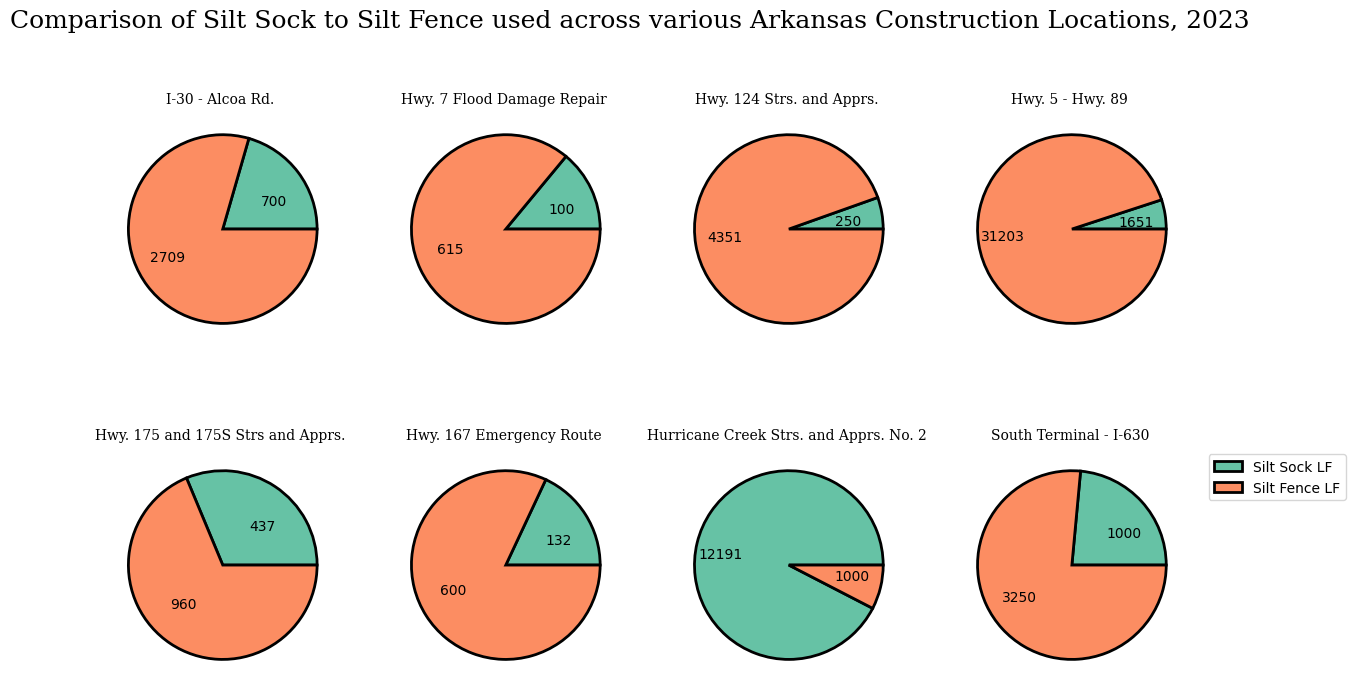

In [215]:
fig = plt.figure(figsize = (14, 8))
plt.suptitle('Comparison of Silt Sock to Silt Fence used across various Arkansas Construction Locations, 2023', font = 'serif', fontsize = 18)

ax1 = plt.subplot2grid((2,4), (0,0))
plt.pie(group1, labels = group1, labeldistance = .5, colors = sns.color_palette('Set2'), wedgeprops = {"edgecolor" : "black", 'linewidth': 2})
plt.title(SS_SF_group.iloc[0, 3], font = 'serif')

ax1 = plt.subplot2grid((2,4), (0,1))
plt.pie(group2, labels = group2, labeldistance = .5, colors = sns.color_palette('Set2'), wedgeprops = {"edgecolor" : "black", 'linewidth': 2})
plt.title(SS_SF_group.iloc[1, 3], font = 'serif')

ax1 = plt.subplot2grid((2,4), (0,2))
plt.pie(group3, labels = group3, labeldistance = .5, colors = sns.color_palette('Set2'), wedgeprops = {"edgecolor" : "black", 'linewidth': 2})
plt.title(SS_SF_group.iloc[2, 3], font = 'serif')

ax1 = plt.subplot2grid((2,4), (0,3))
plt.pie(group4, labels = group4, labeldistance = .5, colors = sns.color_palette('Set2'), wedgeprops = {"edgecolor" : "black", 'linewidth': 2})
plt.title(SS_SF_group.iloc[3, 3], font = 'serif')

ax1 = plt.subplot2grid((2,4), (1,0))
plt.pie(group5, labels = group5, labeldistance = .5, colors = sns.color_palette('Set2'), wedgeprops = {"edgecolor" : "black", 'linewidth': 2})
plt.title(SS_SF_group.iloc[4, 3], font = 'serif')

ax1 = plt.subplot2grid((2,4), (1,1))
plt.pie(group6, labels = group6, labeldistance = .5, colors = sns.color_palette('Set2'), wedgeprops = {"edgecolor" : "black", 'linewidth': 2})
plt.title(SS_SF_group.iloc[5, 3], font = 'serif')

ax1 = plt.subplot2grid((2,4), (1,2))
plt.pie(group7, labels = group7, labeldistance = .5, colors = sns.color_palette('Set2'), wedgeprops = {"edgecolor" : "black", 'linewidth': 2})
plt.title(SS_SF_group.iloc[6, 3], font = 'serif')

ax1 = plt.subplot2grid((2,4), (1,3))
plt.pie(group8, labels = group8, labeldistance = .5, colors = sns.color_palette('Set2'), wedgeprops = {"edgecolor" : "black", 'linewidth': 2})
plt.title(SS_SF_group.iloc[7, 3], font = 'serif')

plt.legend(legend, bbox_to_anchor=(1.05, 1), loc = 'upper left') 
plt.show()


## Now let's make a new data frame with the information that we want

In [238]:
df = pd.read_csv('SS_SF Test Data.csv')

In [242]:
newdf2 = df.loc[df['Design Team Role'] == 'Civil Engineer']

In [256]:
newdf2 = newdf2.drop(columns = ['Street', 'Design Team Company Id', 'Design Team Email', 'Design Team Phone Number', 'Note Text', 'Project Scope', 'List Date', 'Subcategory', 'Mandatory Prebid Conference Date', 'Completion Date', 'Start Date'])

In [258]:
newdf2 = newdf2.drop(columns = 'Category')

In [294]:
newdf2 = newdf2.assign(Coordinates = [(34.56839270485587, -92.58599704502437), (34.12062980109851, -93.05368335161769), (35.2775368967971, -93.13372254095815), (34.78415982935519, -91.90006886427098), (36.31586012738905, -91.48285542677525), (35.769554881130446, -91.64092130807255), (34.569240827359124, -92.58325046307995), (34.78601611414257, -92.28564817503474)])

In [295]:
newdf2['Coordinates'] = newdf2['Coordinates'].astype('str')
newdf2['Coordinates'] = newdf2['Coordinates'].map(lambda x: x.lstrip('(').rstrip(')'))

In [298]:
newdf2['Longitude'] = newdf2['Coordinates'].apply(lambda x: x.split(',')[1])

In [300]:
newdf2['Latitude'] = newdf2['Coordinates'].apply(lambda x: x.split(',')[0])

In [302]:
newdf2 = newdf2.drop(columns = 'Coordinates')

In [303]:
newdf2

,Project Title,Project Value,City,State/Province,Postal Code,County,Design Team Company Name,Design Team Contact Name,Design Team Role,Design Team City,Longitude,Latitude
0,I-30 - Alcoa Rd. (Benton) (S),"$25,056,856",Benton,Arkansas,72019,Saline,Arkansas Department of Transportation,Jared Wiley,Civil Engineer,Little Rock,-92.58599704502437,34.56839270485587
8,Hwy. 7 Flood Damage Repair (Clark Co.) (S),"$1,689,662",Arkadelphia,Arkansas,71923,Clark,Garver - North Little Rock (HQ),Adam Wierciak,Civil Engineer,North Little Rock,-93.05368335161769,34.12062980109851
14,Hwy. 124 Strs. and Apprs. (Pope Co.) (S),"$2,905,442",Russellville,Arkansas,72802,Pope,Garver - North Little Rock (HQ),John Cantabery,Civil Engineer,North Little Rock,-93.13372254095815,35.2775368967971
22,Hwy. 5 - Hwy. 89 (Widening) (Cabot) (F),"$116,993,040",Lonoke,Arkansas,72086,Lonoke,Garver - North Little Rock (HQ),John Cantabery,Civil Engineer,North Little Rock,-91.90006886427098,34.78415982935519
28,Hwy. 175 and 175S Strs and Apprs. (Cherokee Vi...,"$5,149,000",Hardy,Arkansas,72529,Sharp,Arkansas Department of Transportation,Jared Wiley,Civil Engineer,Little Rock,-91.48285542677525,36.31586012738905
38,Hwy. 167 Emergency Route (Ramsey Mountain) (S),"$1,583,546",Batesville,Arkansas,72501,Independence,Garver - North Little Rock (HQ),Nicholas Braddy,Civil Engineer,North Little Rock,-91.64092130807255,35.769554881130446
41,Hurricane Creek Strs. and Apprs. No. 2 (S),"$7,260,520",Benton,Arkansas,72015,Saline,Arkansas Department of Transportation,Charles Ellis,Civil Engineer,Little Rock,-92.58325046307995,34.569240827359124
48,South Terminal - I-630 (S),"$14,696,211",North Little Rock,Arkansas,72114,Pulaski,Garver - North Little Rock (HQ),Dustin Tackett,Civil Engineer,North Little Rock,-92.28564817503474,34.78601611414257


## Time to play around with GeoPandas

In [342]:
# collect cooridnate points from Longitude and Latitude, creates a new geography column that can then be plotted on a map of Arkansas
gdf = gpd.GeoDataFrame(newdf2, geometry = gpd.points_from_xy(newdf2['Longitude'], newdf2['Latitude'], crs = "EPSG:4326"))
lf = (newdf['SS LF'] + newdf['SF LF']) / 100
arkansas = gpd.read_file(r'C:\Users\14175\Downloads\arkansas.geojson')

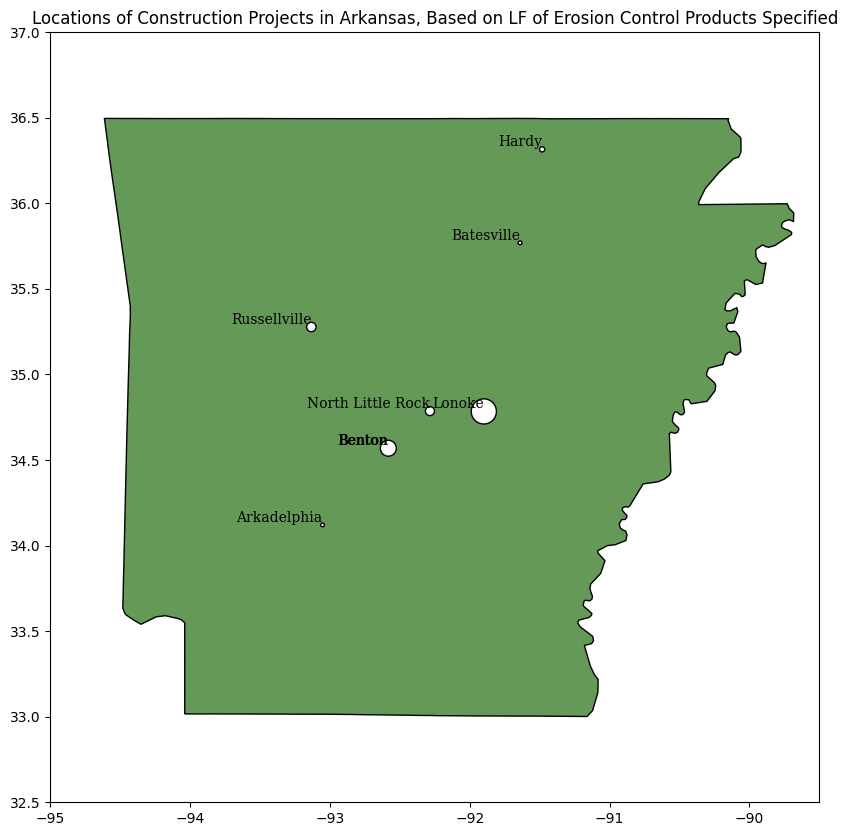

In [452]:
ax = arkansas.plot(figsize = (18, 10),
    color='#659957', edgecolor='black')
gdf.plot(ax=ax, color='k', markersize = lf, facecolor = 'white')

for idx, row in gdf.iterrows():
    ax.annotate(text=row['City'], xy=(row['geometry'].x, row['geometry'].y),
    horizontalalignment='right', verticalalignment='bottom', font = 'serif')


minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(-95, -89.5)
ax.set_ylim(32.5, 37)

plt.title('Locations of Construction Projects in Arkansas, Based on LF of Erosion Control Products Specified')
plt.show()